In [1]:
#link google drive

from google.colab import drive

drive.mount('/content/drive', force_remount=True)

#install any necessary packages to the colab env
!pip install wfdb
!pip install neurokit2
!pip install py-ecg-detectors
!pip install bigO

#change path in google colab to import functions from the toolbox
os.getcwd()
new_direct = "/content/drive/MyDrive/Colab_Notebooks/CiC_project/Orphanidou "
os.chdir(new_direct)
from orphanidou import assess_qual

#change path in google colab to import functions from the toolbox
path = '/content/drive/MyDrive/Colab_Notebooks/CiC_project/Automated_ecg_assessment_og'
os.chdir(path)
from toolbox.AlgorithmsV5_k_model import processing

#change path in google colab to import functions from the toolbox
path = '/content/drive/MyDrive/Colab_Notebooks/CiC_project/ECGAssess_og'
os.chdir(path)
from Code.AlgorithmsV5 import processing1

#change path in google colab to import functions from the toolbox
new_direct = "/content/drive/MyDrive/Colab_Notebooks/CiC_project/framework_for_synthetic_biosignals"
os.chdir(new_direct)

# %matplotlib widget
import ecg_generator as eg
import noise_generator as ng
import beat_interval_generator as big
import tensorflow as tf

import sys
path = '/content/drive/MyDrive/Colab_Notebooks/CiC_project'
os.chdir(path)

from functions import plotting_df
from functions import first_below_05

#other tools to use
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
from ecgdetectors import Detectors
import scipy.stats
import neurokit2 as nk
import time
import tensorflow as tf
import pandas as pd


Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.2/689.2 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 554.5/554.5 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gatspy: filename=gatspy-0.3-py3-none-any.whl size=43804 sha256=2b9663e97dcc4a19fd50031dc788dfa17a6bbadc6f6be216df3bdc6a8bdaec09
  Stored in directory: /root/.cache/pip/wheels/13/39/c2/d113611d276bf55252ed5a640e98596d7dcc96535afbf254d5
Successfully built gatspy


In [2]:
path = '/content/drive/MyDrive/Colab_Notebooks/CiC_work/framework_for_synthetic_biosignals/beats_array.npy'
beats2 = np.load(path)

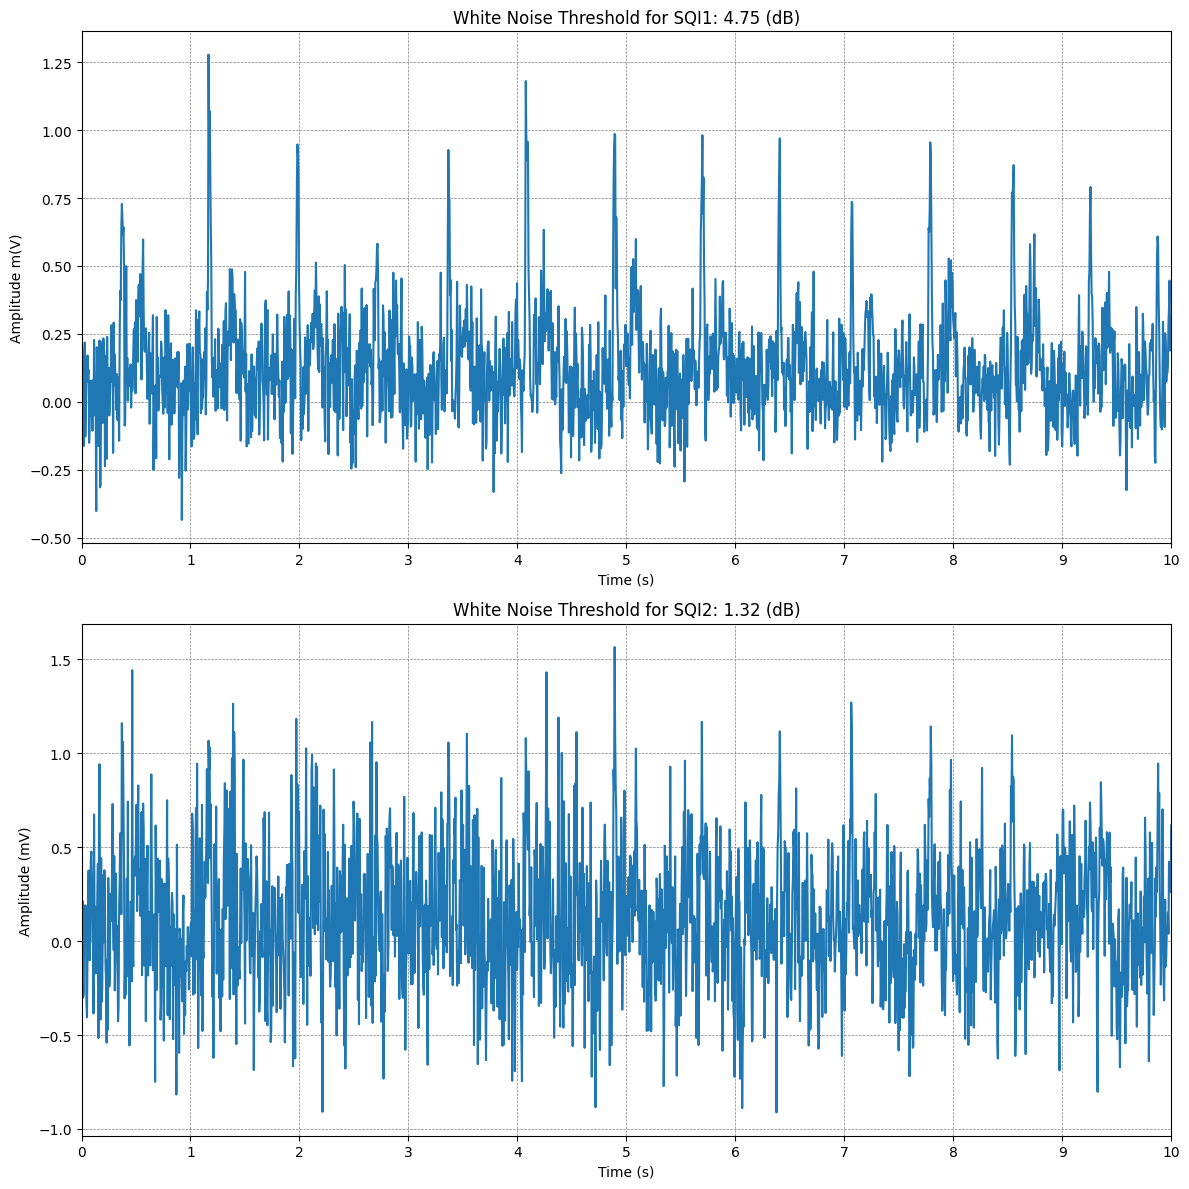

In [31]:
# Generate the noisy ECG signal
ecg = eg.ECGGenerator()
ecg.beat_interval_generator.beat_intervals = beats2
ecg.noise_generator.noise_type.wn = 24  # Set white noise to 2
signal_2, peaks, labels, beats = ecg.generate()
signal_2 = signal_2[:2000]

# Generate the noisy ECG signal
ecg = eg.ECGGenerator()
ecg.beat_interval_generator.beat_intervals = beats2
ecg.noise_generator.noise_type.wn = 148  # Set white noise to 2
signal_3, peaks, labels, beats = ecg.generate()
signal_3 = signal_3[:2000]
plt.figure(figsize=(12, 12))


total_time = 10
time = np.linspace(0, total_time, len(signal_2))

# Plot for signal_2
plt.subplot(2, 1, 1)


# Plot for signal_2
plt.subplot(2, 1, 1)
plt.plot(time, signal_2)
plt.grid(True, which='both', linestyle='--', color='gray', linewidth=0.5)
plt.title('White Noise Threshold for SQI1: 4.75 (dB)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude m(V)')
plt.xticks(np.arange(0, 11, 1))
plt.xlim(0, 10)


# Plot for signal_3
plt.subplot(2, 1, 2)
plt.plot(time, signal_3)
plt.grid(True, which='both', linestyle='--', color='gray', linewidth=0.5)
plt.title('White Noise Threshold for SQI2: 1.32 (dB)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.xticks(np.arange(0, 11, 1))
plt.xlim(0, 10)

plt.tight_layout()
plt.show()




plt.show()

In [ ]:
#now lets calculate the SNR using the clean ecg & the nois(ier) ecg
ecg = eg.ECGGenerator()
ecg.beat_interval_generator.beat_intervals = beats2
ecg.noise_generator.noise_type.wn = 0
signal, peaks, labels, beats = ecg.generate()

#get first 10 seconds of the signal
signal = signal[0:2000]

# Step 1: Square the signal values
squared_signal = np.square(signal)

# Step 2: Compute the mean of the squared values to get the power
sum_squared_signal = np.sum(squared_signal)
signal_power = sum_squared_signal/N

#generate a signal with the white noise
ecg = eg.ECGGenerator()
ecg.beat_interval_generator.beat_intervals = beats2
ecg.noise_generator.noise_type.wn = 2
signal, peaks, labels, beats = ecg.generate()
signal_wn = signal[0:2000]

#get the total power of this

# Step 1: Square the signal values
squared_signal = np.square(signal_wn)

# Step 2: Compute the mean of the squared values to get the power
sum_squared_signal = np.sum(squared_signal)
signal_power_wn = sum_squared_signal/N

print("Signal Power:", signal_power_wn)

#calculate the power of the white noise only
signal_p_onlywn = signal_power_wn - signal_power

print("Signal Power_wn:", signal_p_onlywn)

#calculate the SNR
SNR_2 = signal_power / signal_p_onlywn
print("SNR method 2:", SNR_2)
SNR2_db = 10*np.log10(SNR_2)

print("SNR (db):", SNR2_db)

#when the WN is low (2) then the SNR is high (df = 6.514225592098736)


Signal Power: 0.03566092968643001
SNR: 0.003566092968643001
SNR (db): -24.478073388829472
